# Data Visualisation (Balanced Dataset)

This Python notebook is to visualize the results from the experiments conducted. All methods were validated using Stratified 10 Fold Sampling. The utilized dataset consisted of 50% True Negative comments and 50% True Positive.

## Classifiers 

The following classifiers were used:

- Random Forest with 100 trees
- Support Vector Machine (LinearSVC from sklearn)
- Naive Bayes (Gaussian Naive Bayes)

## Methods 

The following methods for classification were used:

- Bag-Of-Words 
- Bag-Of-words + TFIDF 
- Average Sentence
- Average Words 
- Average Words + TFIDF 
- Average Words + Mean Similarity (Hybrid Approach) 
- Average Words + Mean Similarity + TFIDF (Hybrid Approach) 
- Word Feature 
- Word Feature + TFIDF 
- Word Feature + Mean Similarity 
- Word Feature + Mean Similarity + TFIDF 
- K-Means Frequency Clustering 
- K-Means POS Style
- K-Means Mean similarity Cluster
- K-Means Mean similarty + TFIDF 

## Evaluation Metrics

The following evaluation metrics were taken under consideration:

- Accuracy
- Precision
- False Positive Rate
- Area Under Curve (AUC) 
- Logarithmic Loss (Log Loss)
- Brier Score Loss
- Run Time for test set

The Standard Deviation for all metrics were also taken into consideration

## Overall Mean

The mean scores from all methods were calculated and displayed using a barchart. The following metrics were:

- Accuracy
- Precision
- False Positive Rate
- Area Under Curve (AUC)
- Logarithmic Loss (Log Loss)
- Brier Score Loss
- Run Time

In [1]:
# Load Excel File using Pandas
import pandas as pd

xls = pd.ExcelFile("C:/Users/MyPC/Desktop/Vegito/Results (Balanced).xlsx")

In [2]:
# Verify the sheets(workbooks)

xls.sheet_names

['Accuracy', 'Precision', 'FPR', 'AUC', 'Log Loss', 'Brier Score', 'Run Time']

In [3]:
# Load the libraries (ONLY ONCE)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
# Function to plot confusion matrix
import pickle

def plotConfusionMatrix(file_name, method):
    
    # Load the file
    cm_dict = pickle.load(open(file_name,"rb"))
    
    # Confusion Matrix form:
    # TP FN
    # FP TN
    row_one = [cm_dict['tp'], cm_dict['fn']]
    row_two = [cm_dict['fp'], cm_dict['tn']]
    
    confusion_matrix = [row_one, row_two]
    
    # Labels for the confusion matrix
    labels = ["Positive","Negative"]
    
    # Create Dataframe for the confusion matrix
    df_cm = pd.DataFrame(confusion_matrix, index = [label for label in labels],
                  columns = [label for label in labels])
    
    # Matplotlib variables
    FONT_SIZE = 15
    PADDING = 40
    title = method
    
    # Create Heatmap using Seaborne library
    plt.figure(figsize = (3,3))
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.figtext(.45,.95,title, fontsize=FONT_SIZE, ha='center')
    
    sns.heatmap(df_cm, annot=True, fmt="d", linewidths=.5, cmap="RdBu_r")

In [5]:
# Load the confusion matrix directory
import os

# Show the directory
DIR = "C:/Users/MyPC/Desktop/Vegito/Confusion Matrix (Balanced)"

# Load all files and save in a variable
FILES = os.listdir(DIR)

In [6]:
# Function to display all the confusion Matrix
def displayConfusionMatrix(model_abb):
    
    # Get the files first
    files = [ file for file in FILES if file.startswith(model_abb)]

    for file in files:
        
        # Plot using heatmap
        plotConfusionMatrix(DIR + "/" + file, file.replace(".pk",""))

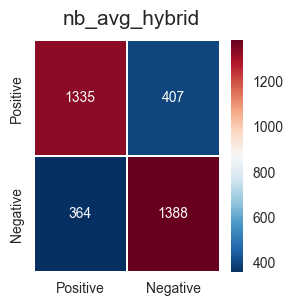

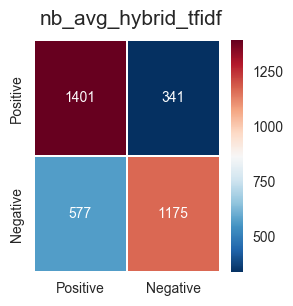

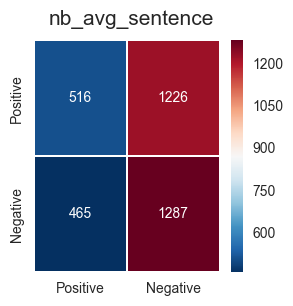

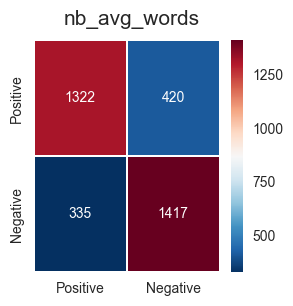

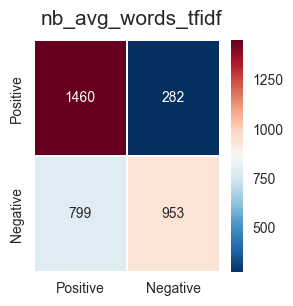

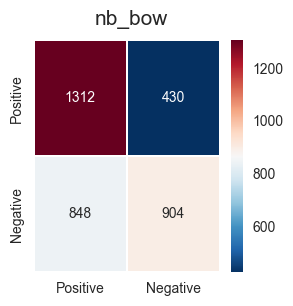

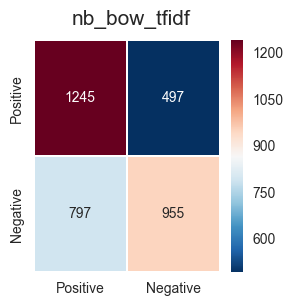

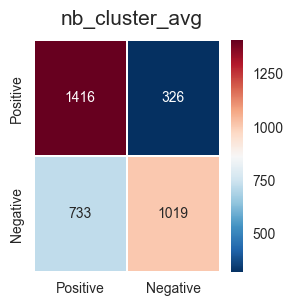

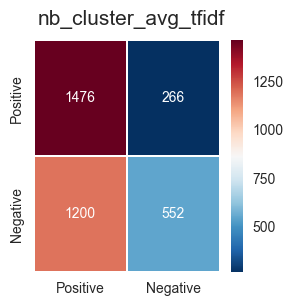

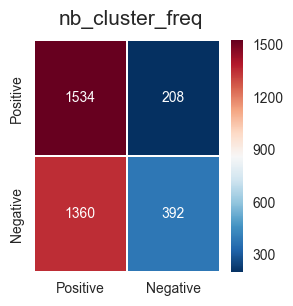

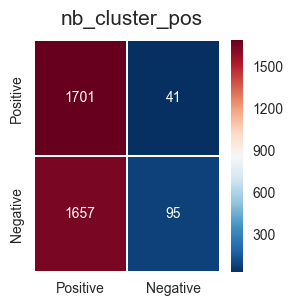

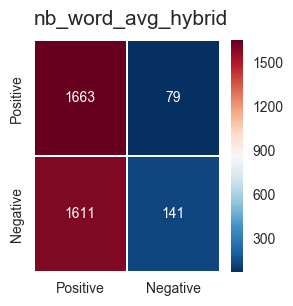

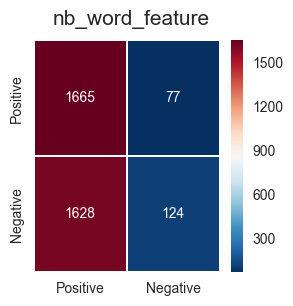

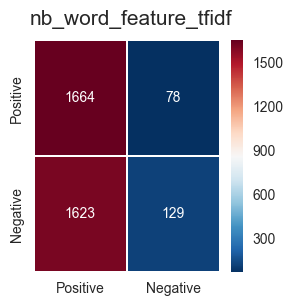

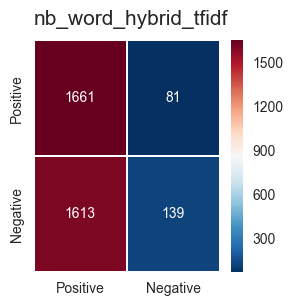

In [7]:
# NAIVE BAYES
        
displayConfusionMatrix('nb')

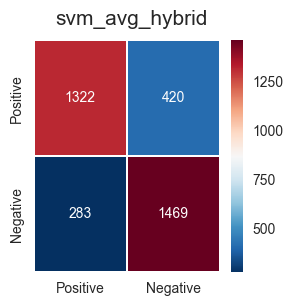

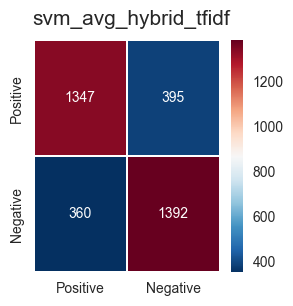

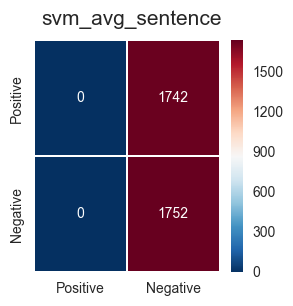

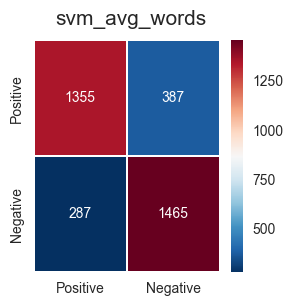

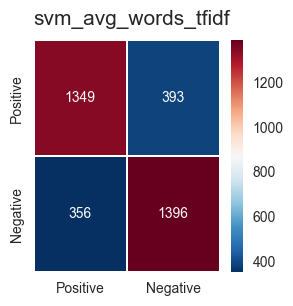

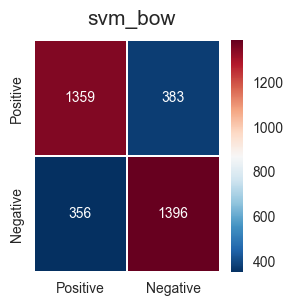

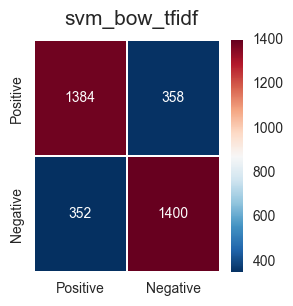

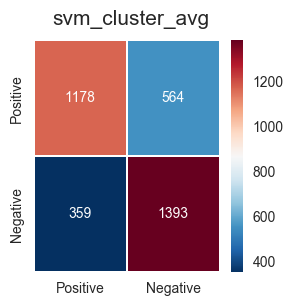

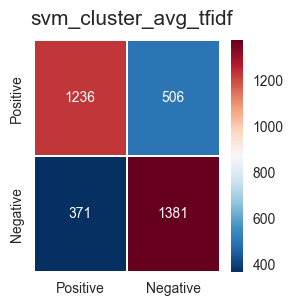

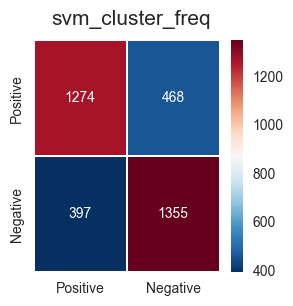

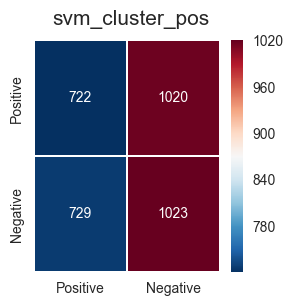

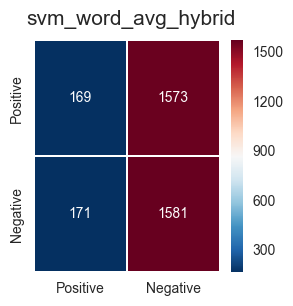

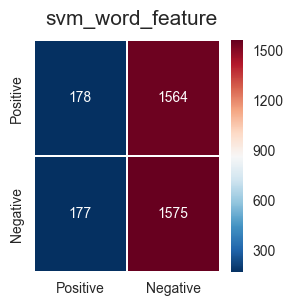

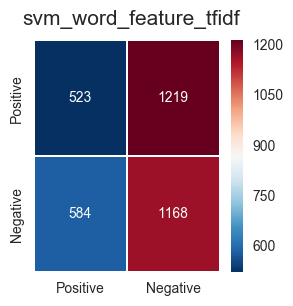

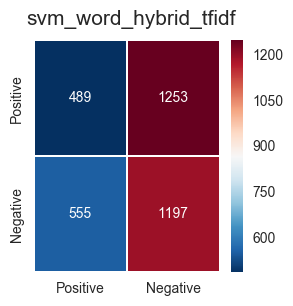

In [8]:
# SUPPORT VECTOR MACHINES

displayConfusionMatrix('svm')

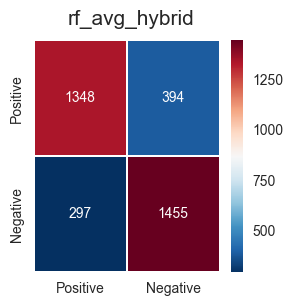

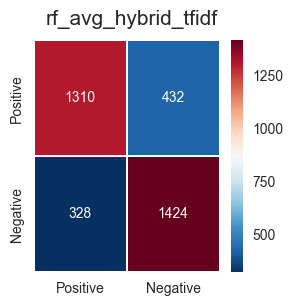

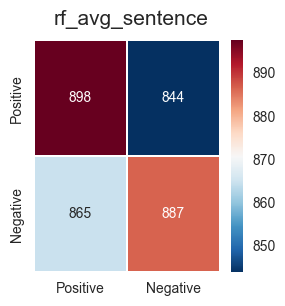

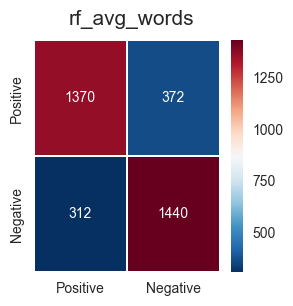

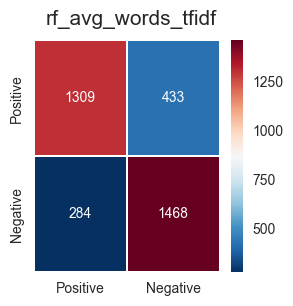

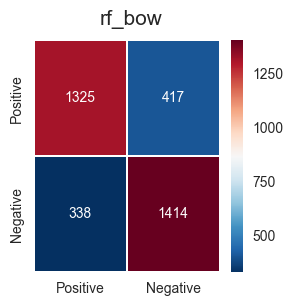

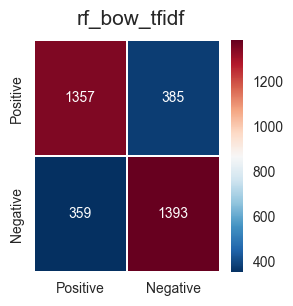

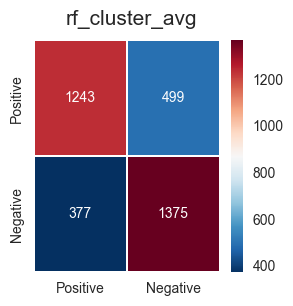

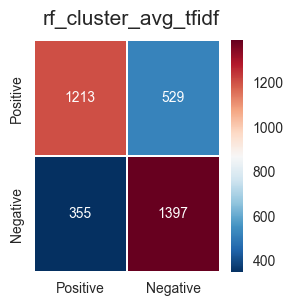

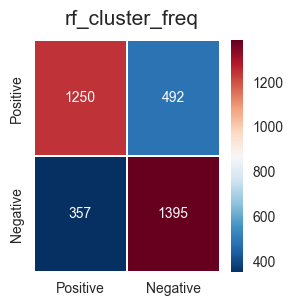

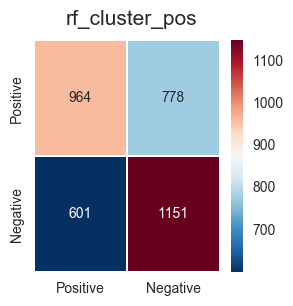

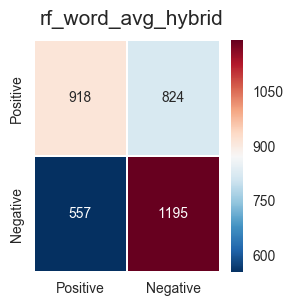

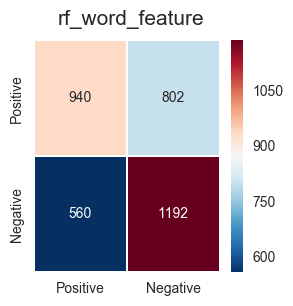

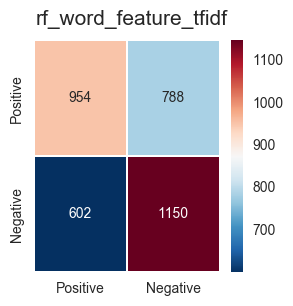

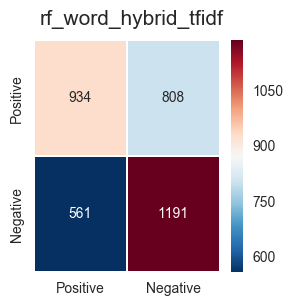

In [9]:
# RANDOM FOREST

displayConfusionMatrix('rf')

In [10]:
# Function to standardize the given dataframe and return the standard dataframe

def standardizeDataFrame(df):
    
    # Table to store dictionaries
    format_table = []
    
    # Lower Case the columns' name
    df.columns = map(str.lower, df.columns)
    
    # Classifier Array
    clf_dict = {"Naive Bayes": "nb",
                "SVM": "svm",
                "Random Forest": "rf"}
    
    # Loop classifier by classifier
    # Then get the results along with the standard deviation
    for key, value in clf_dict.items():
        
        for i, method in enumerate(df['method']):
            
            format_table.append({'method': method,
                         'model': key,
                         'value': df[value][i],
                         'std': df[value + " (std)"][i]})
            
    
    # Overwrite the table
    df = pd.DataFrame(format_table)
    
    return df

In [11]:
# Function to create point plot for the given metric
def createPointPlot(df, title, legend_loc):
    
    # Recreate the title
    title = title + " Scores"
    
    # Plot for Accuracy 
    plt.figure(figsize=(30,8))

    # Dataframe-related
    clf_list = df['model'].unique()
    method_list = df['method']

    # Matplotlib variables
    FONT_SIZE = 30
    PADDING = 40

    fig = sns.pointplot(x='method', y='value', hue='model', palette="muted",
                        data=df[df.model.map(lambda x: x in clf_list)])


    plt.rc('axes', labelsize=FONT_SIZE)
    plt.rc('axes', titlesize=FONT_SIZE)
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.ylim(ymin=0)
    plt.figtext(.5,.95,title, fontsize=FONT_SIZE, ha='center')
    plt.grid(True)

    sns.set_context("notebook", font_scale=2.1)
    sns.set_style('ticks')
    sns.despine()
    
    fig.set(ylabel="Score")
    fig.set_xticklabels(rotation=30, labels=method_list)
    fig.set(xlabel="Method")
    fig.axes.legend(loc=legend_loc, prop={'size': 20})

In [12]:
# Function to create a barchart for each metric

def plotBarChart(df, title):
    
    #Create Title
    title = "Average " + title
    
    # Figure size
    plt.figure(figsize=(14,4))
    
    # Matplotlib variables
    FONT_SIZE = 20
    PADDING = 30
    
    # Plot chart
    fig = sns.barplot(x="model", y="value", data=df)
    
    # Matplotlib functions
    plt.rc('axes', labelsize=FONT_SIZE)
    plt.rc('axes', titlesize=FONT_SIZE)
    plt.xlabel("...", labelpad=PADDING)
    plt.ylabel("...", labelpad=PADDING)
    plt.figtext(.5,.95,title, fontsize=FONT_SIZE, ha='center')
    plt.grid(True)
    
    sns.set_context("notebook", font_scale=1.5)
    
    # Final configuations
    fig.set(ylabel="Score")
    fig.set(xlabel="Method")
    
    return

# Accuracy 

Accuracy is defined as the set of labels predicted for a given sample must exactly match the corresponding set of labels in ground truth (correct) labels.

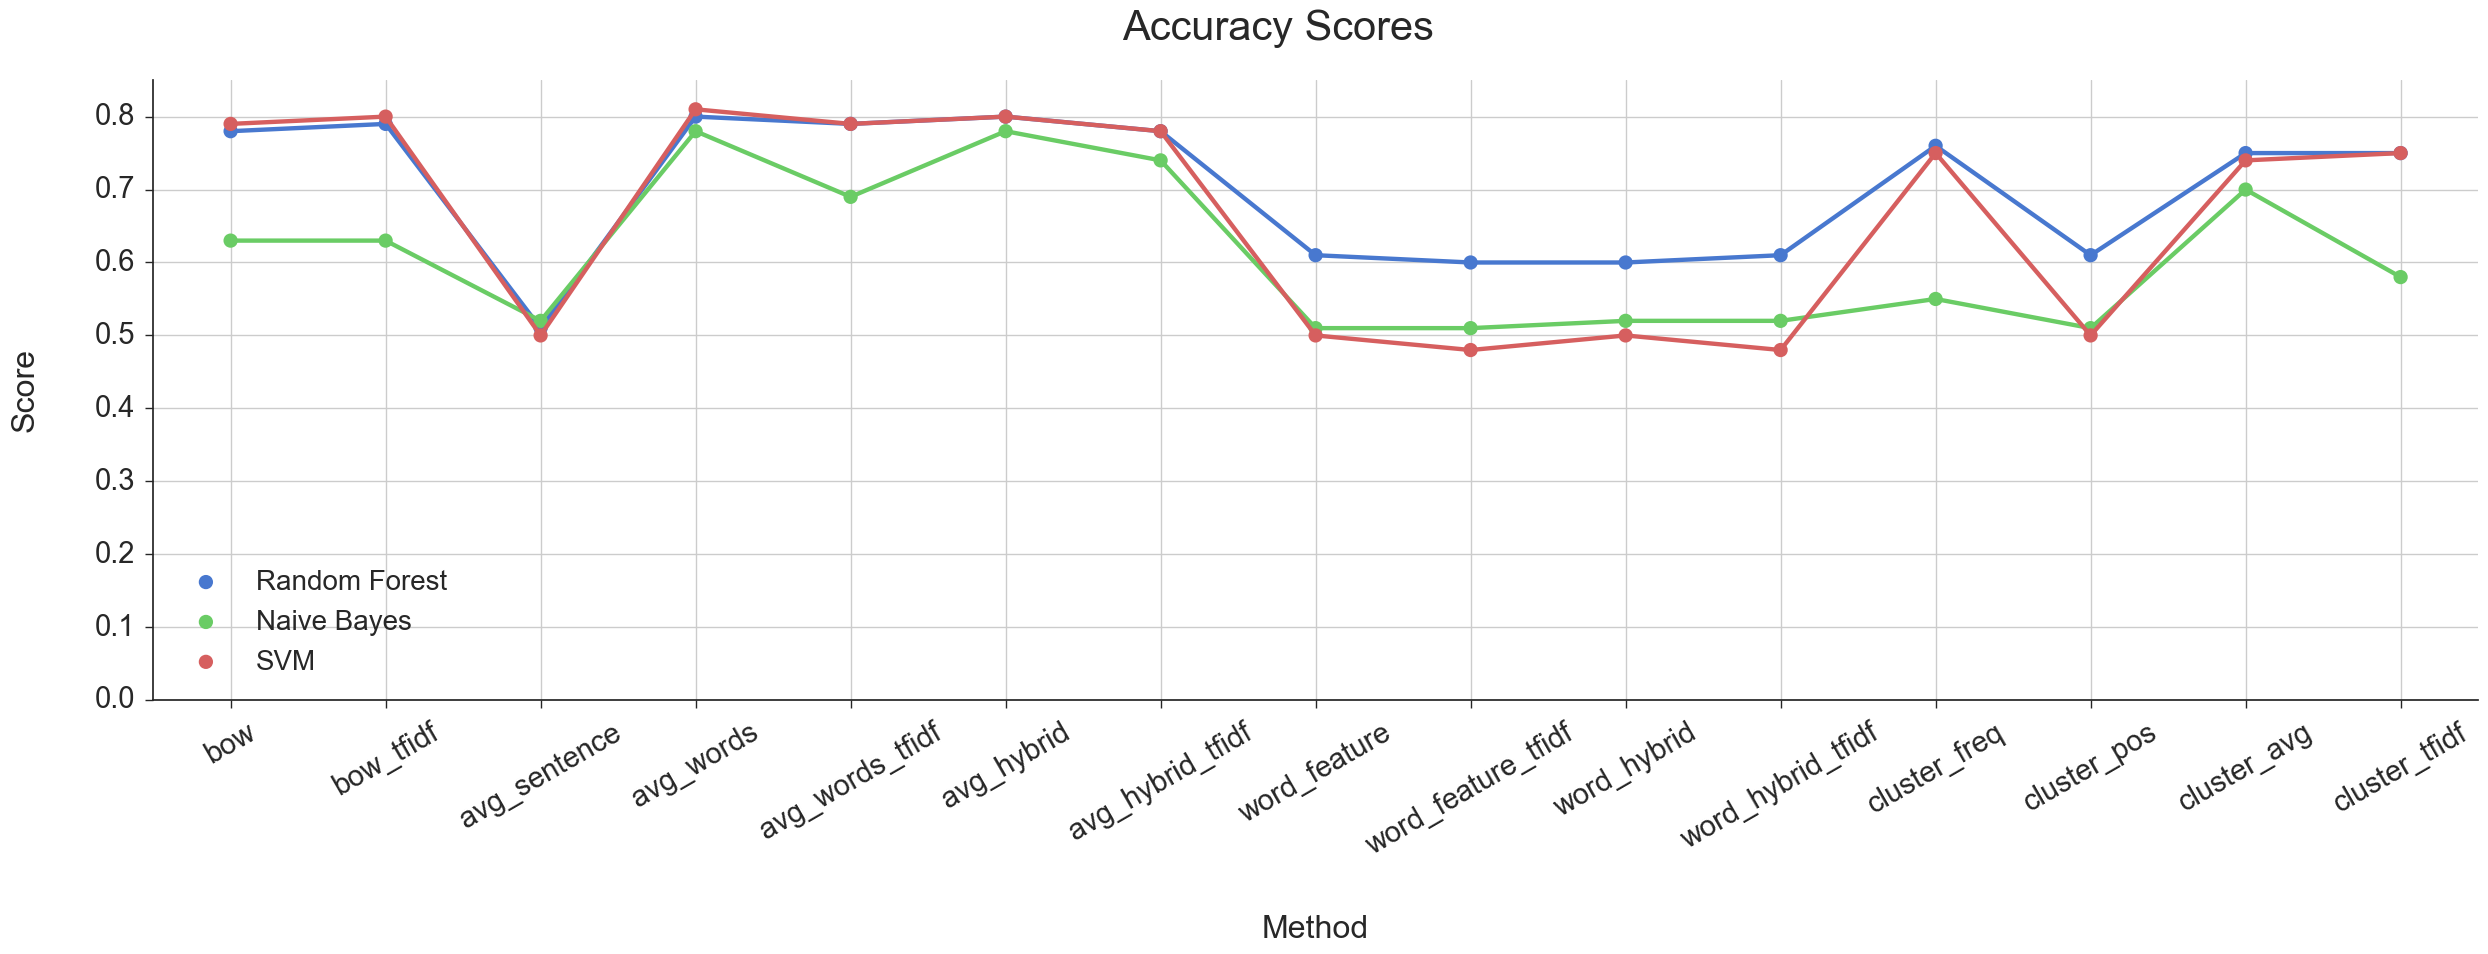

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.79,0.02,0.63,0.02,0.78,0.02
1,bow_tfidf,0.80,0.02,0.63,0.02,0.79,0.02
2,avg_sentence,0.50,0.00,0.52,0.02,0.51,0.03
3,avg_words,0.81,0.01,0.78,0.02,0.80,0.01
4,avg_words_tfidf,0.79,0.02,0.69,0.03,0.79,0.02
5,avg_hybrid,0.80,0.02,0.78,0.02,0.80,0.02
6,avg_hybrid_tfidf,0.78,0.01,0.74,0.03,0.78,0.03
7,word_feature,0.50,0.02,0.51,0.01,0.61,0.02
8,word_feature_tfidf,0.48,0.01,0.51,0.01,0.60,0.02
9,word_hybrid,0.50,0.01,0.52,0.01,0.60,0.02


In [29]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Accuracy'))
normal_df = xls.parse('Accuracy')

# Create the point plot
createPointPlot(transformed_df, 'Accuracy', 'lower left')

# Show the plot and the results in table
plt.show()
normal_df

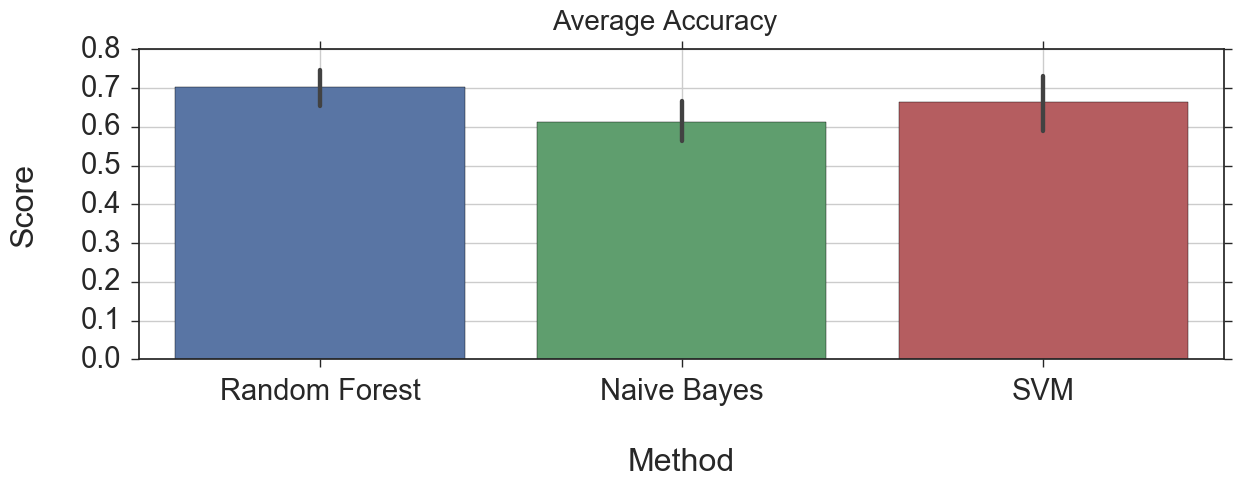

In [14]:
# Plot barchart
plotBarChart(transformed_df, 'Accuracy')

# Precision

Precision is the capability of a classifier not to label a sample as positive when its actual value is negative. The precision is the ratio of the total number of true positives to the total number of true positives and false negatives.

Formula to calculate Precision: $$ PPV = \frac{TP}{TP + FP} $$

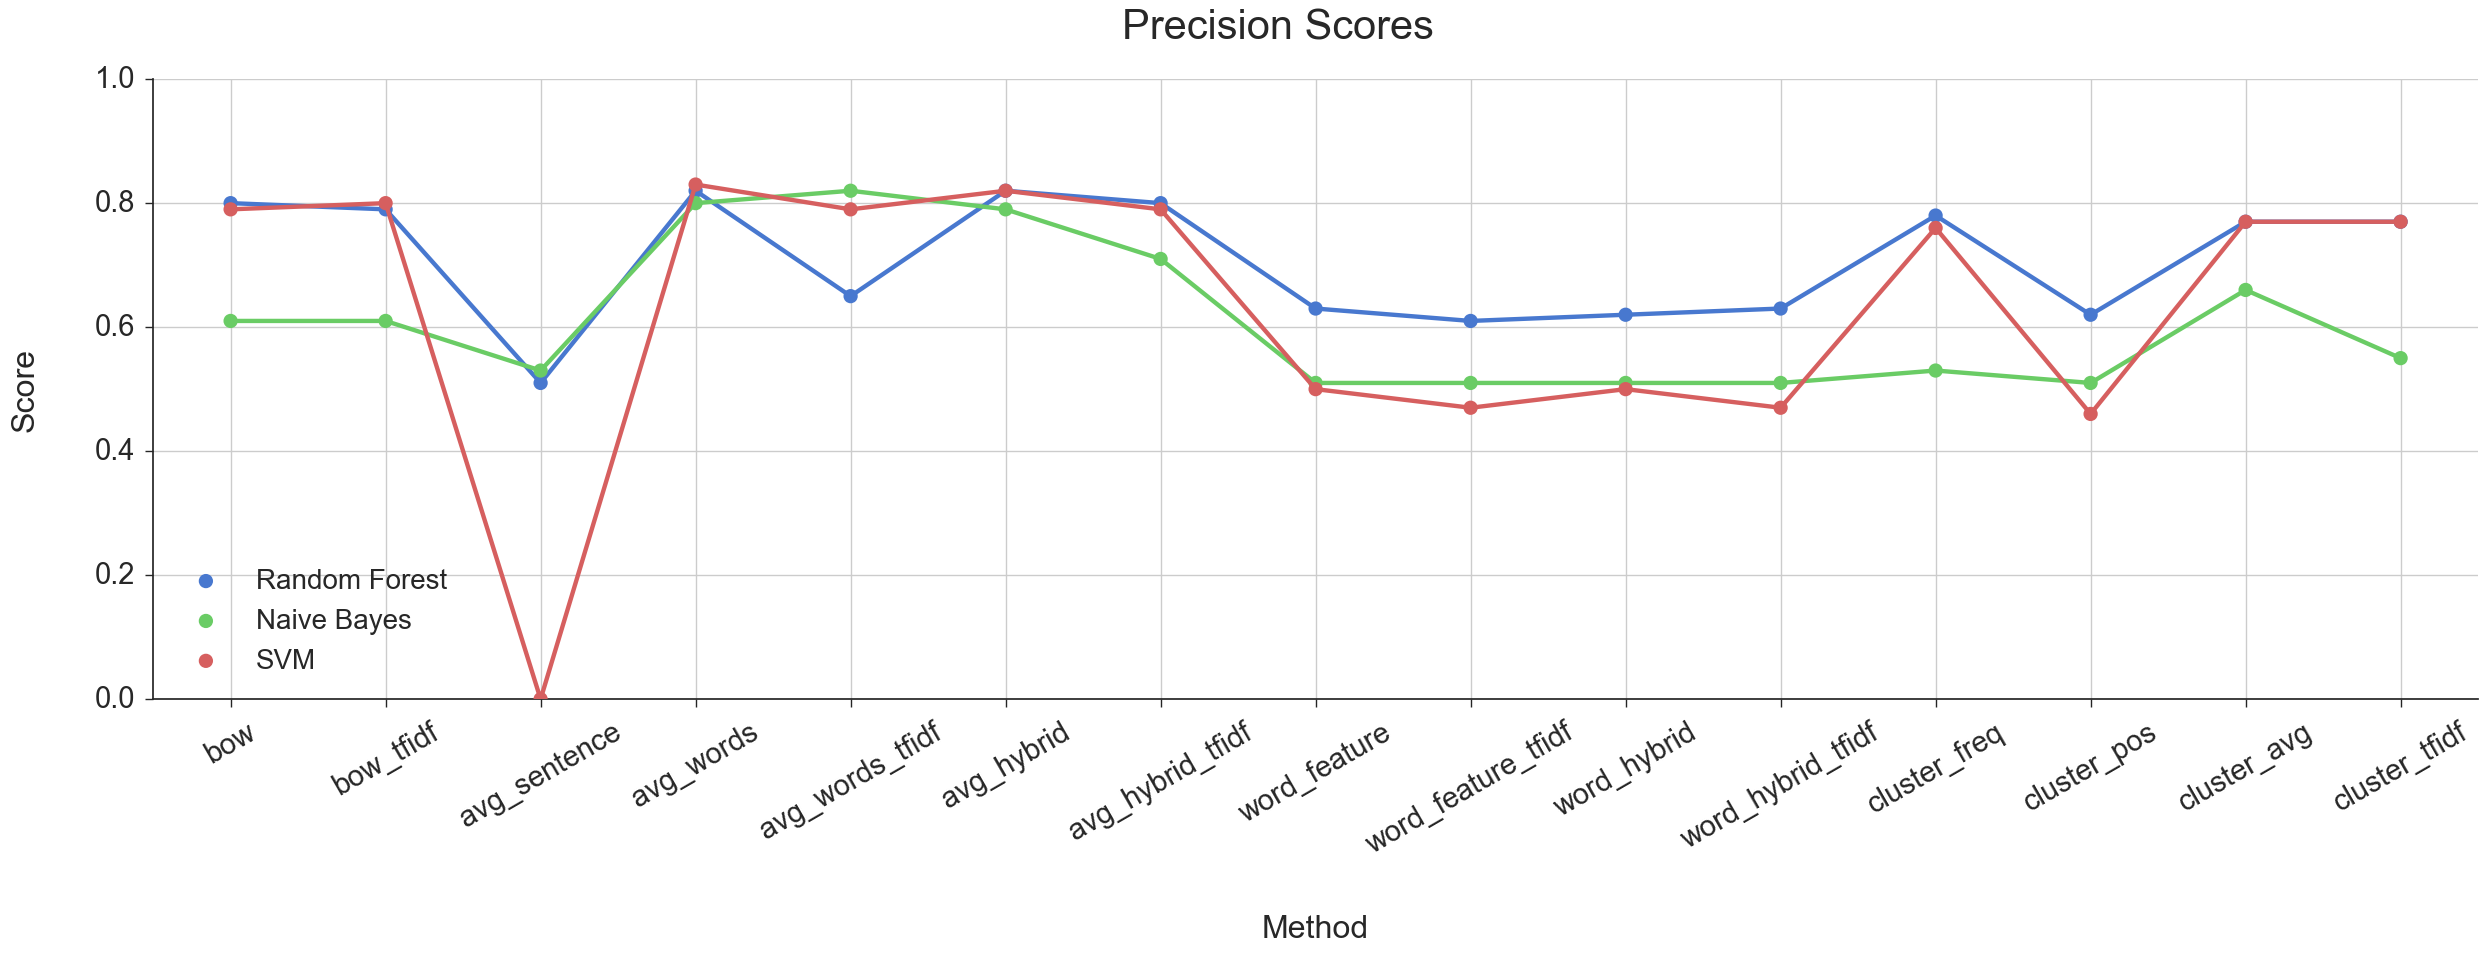

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.79,0.03,0.61,0.02,0.80,0.03
1,bow_tfidf,0.80,0.03,0.61,0.02,0.79,0.03
2,avg_sentence,0.00,0.00,0.53,0.04,0.51,0.03
3,avg_words,0.83,0.02,0.80,0.02,0.82,0.02
4,avg_words_tfidf,0.79,0.02,0.82,0.03,0.65,0.03
5,avg_hybrid,0.82,0.03,0.79,0.03,0.82,0.03
6,avg_hybrid_tfidf,0.79,0.01,0.71,0.03,0.80,0.03
7,word_feature,0.50,0.08,0.51,0.01,0.63,0.03
8,word_feature_tfidf,0.47,0.02,0.51,0.00,0.61,0.02
9,word_hybrid,0.50,0.06,0.51,0.01,0.62,0.03


In [31]:
# Parse the precision sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Precision'))
normal_df = xls.parse('Precision')

# Create the point plot
createPointPlot(transformed_df, 'Precision', 'lower left')

# Show the plot and the results in table
plt.show()
normal_df

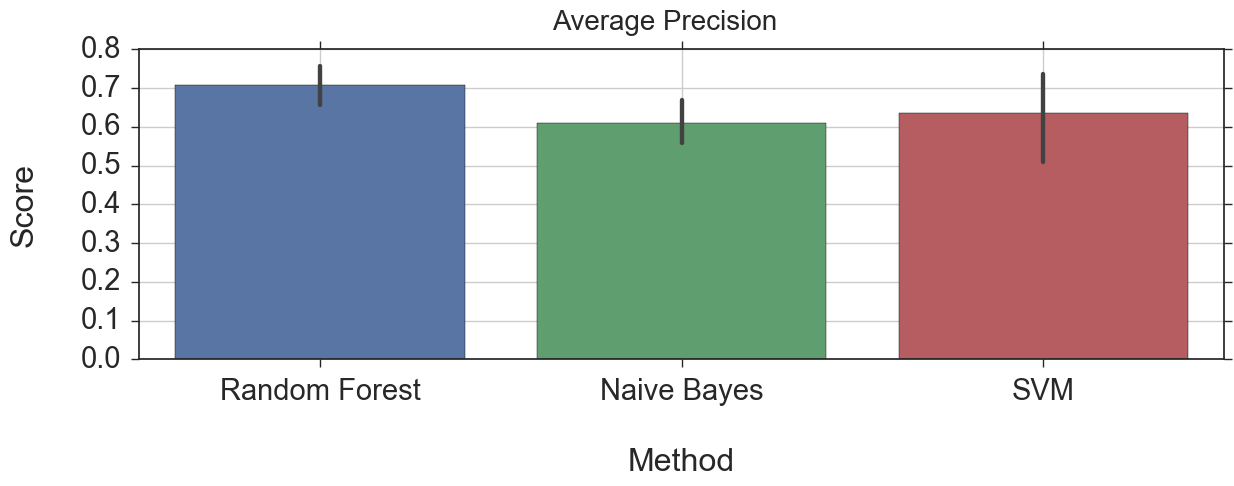

In [16]:
# Plot Barchart
plotBarChart(transformed_df, 'Precision')

# False Positive Rate (FPR)

The false positive rate, also called false alarm ratio, usually refers to the probability of falsely rejecting the null hypothesis for a particular test. The false positive rate is calculated as the ratio between the number of negative events wrongly categorized as positive (false positives) and the total number of actual negative events (regardless of classification). (Source Wikipedia)

Formula to calculate FPR: $$ FPR = \frac{FP}{FP + TN} $$

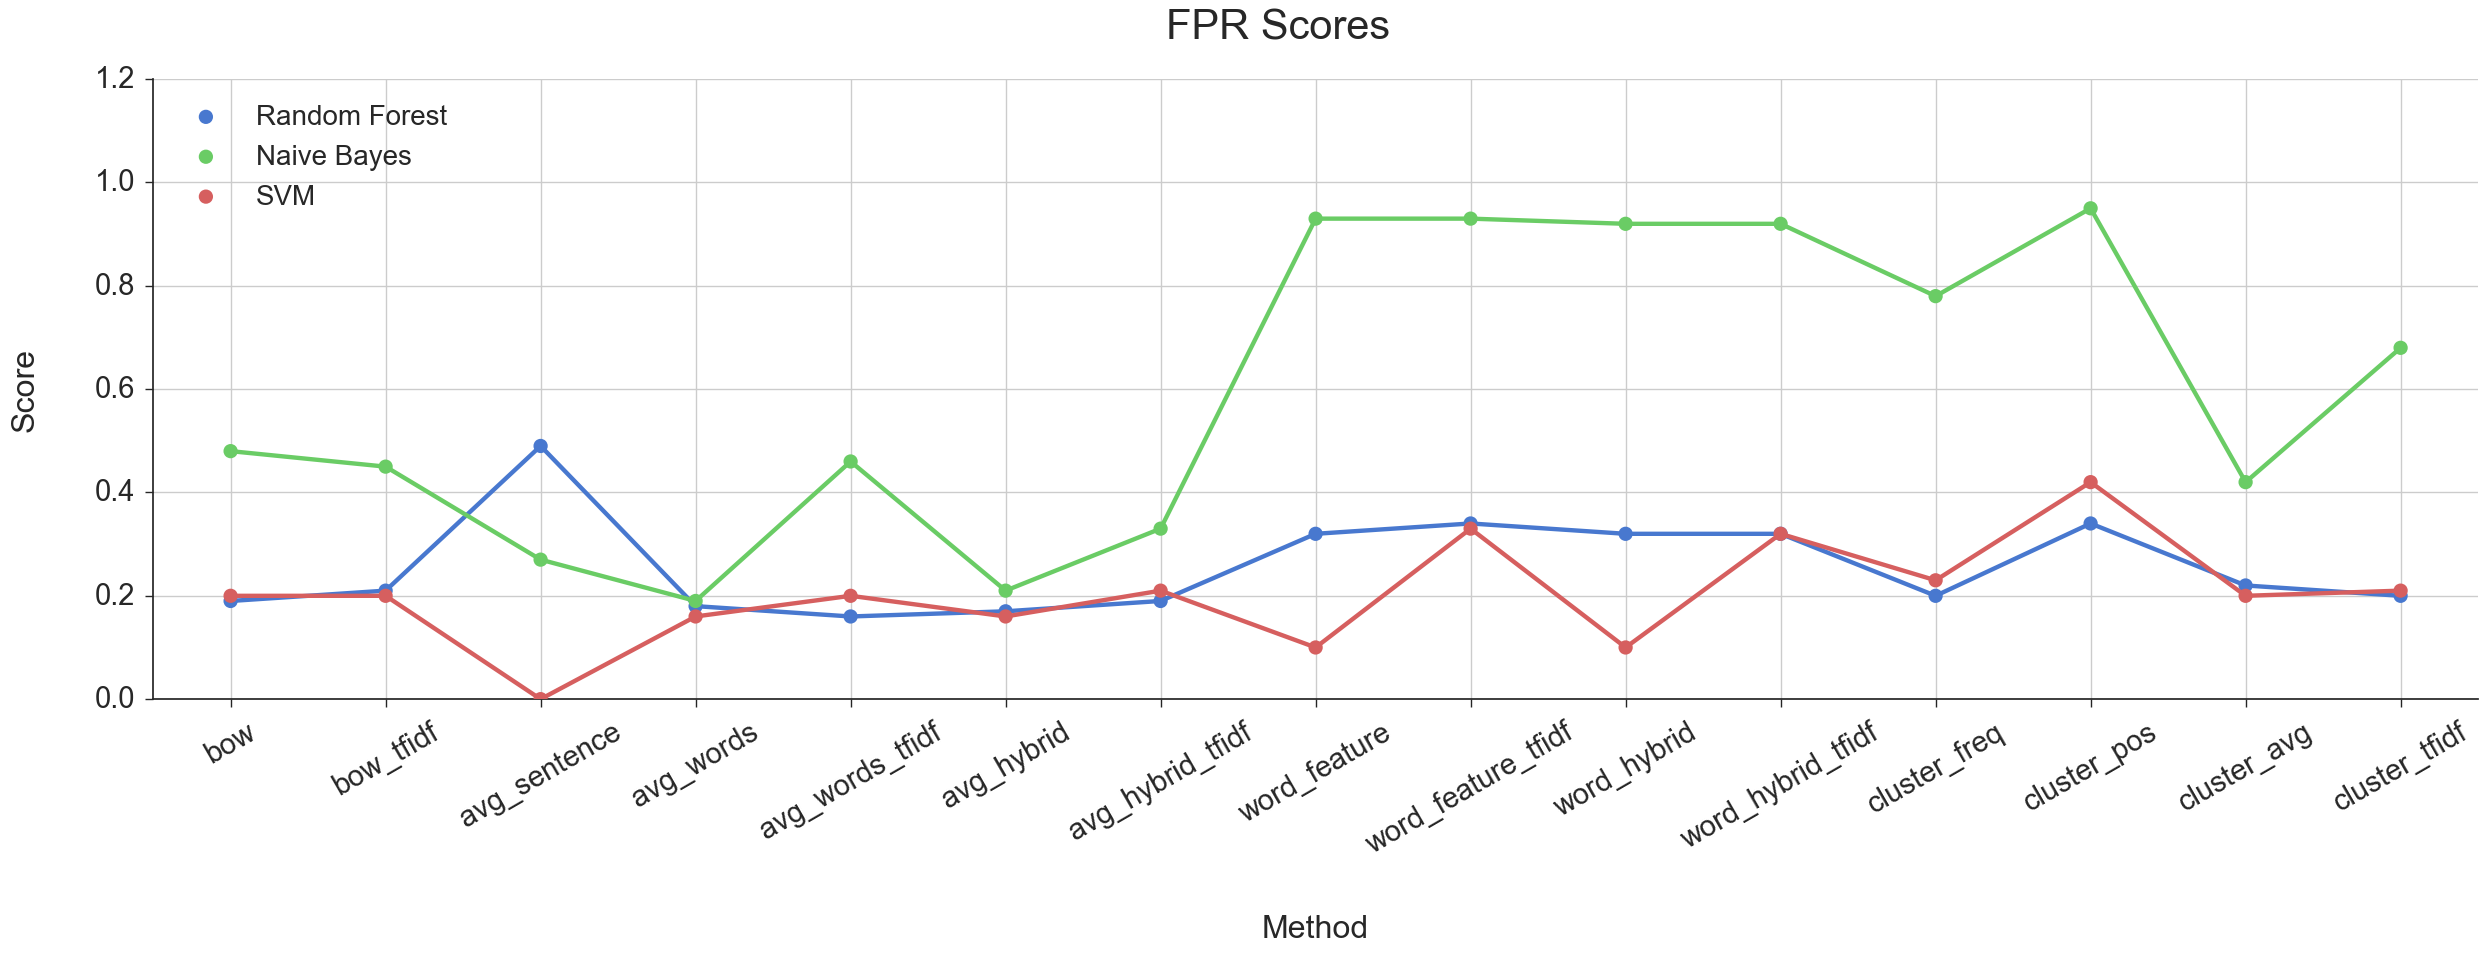

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.20,0.04,0.48,0.03,0.19,0.04
1,bow_tfidf,0.20,0.03,0.45,0.03,0.21,0.03
2,avg_sentence,0.00,0.00,0.27,0.03,0.49,0.03
3,avg_words,0.16,0.03,0.19,0.02,0.18,0.03
4,avg_words_tfidf,0.20,0.02,0.46,0.05,0.16,0.04
5,avg_hybrid,0.16,0.03,0.21,0.04,0.17,0.03
6,avg_hybrid_tfidf,0.21,0.01,0.33,0.04,0.19,0.03
7,word_feature,0.10,0.02,0.93,0.01,0.32,0.03
8,word_feature_tfidf,0.33,0.04,0.93,0.02,0.34,0.03
9,word_hybrid,0.10,0.02,0.92,0.03,0.32,0.04


In [33]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('FPR'))
normal_df = xls.parse('FPR')

# Create the point plot
createPointPlot(transformed_df, 'FPR', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

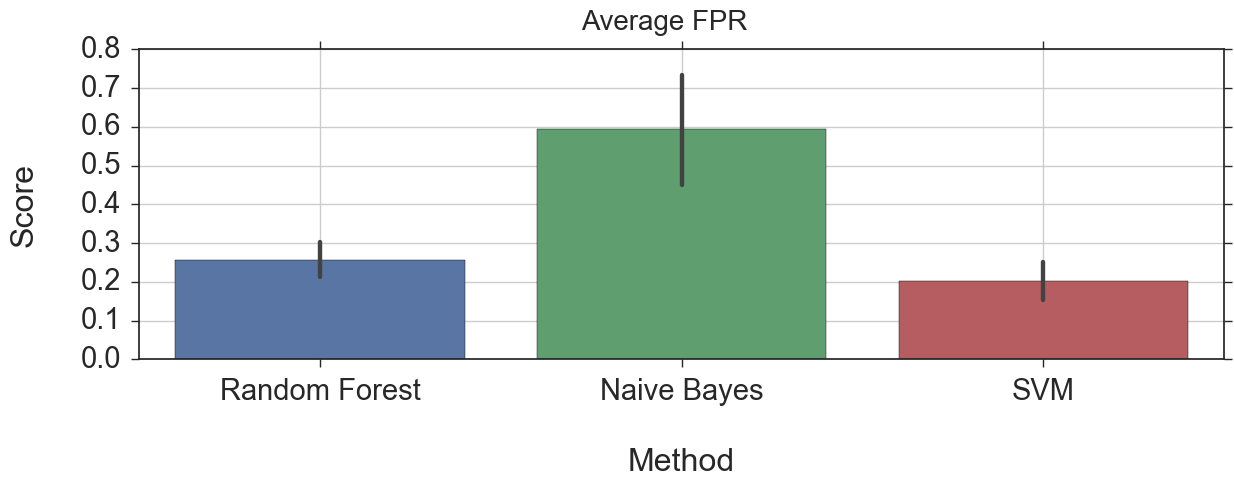

In [18]:
plotBarChart(transformed_df, 'FPR')

# Area Under Curve (AUC)

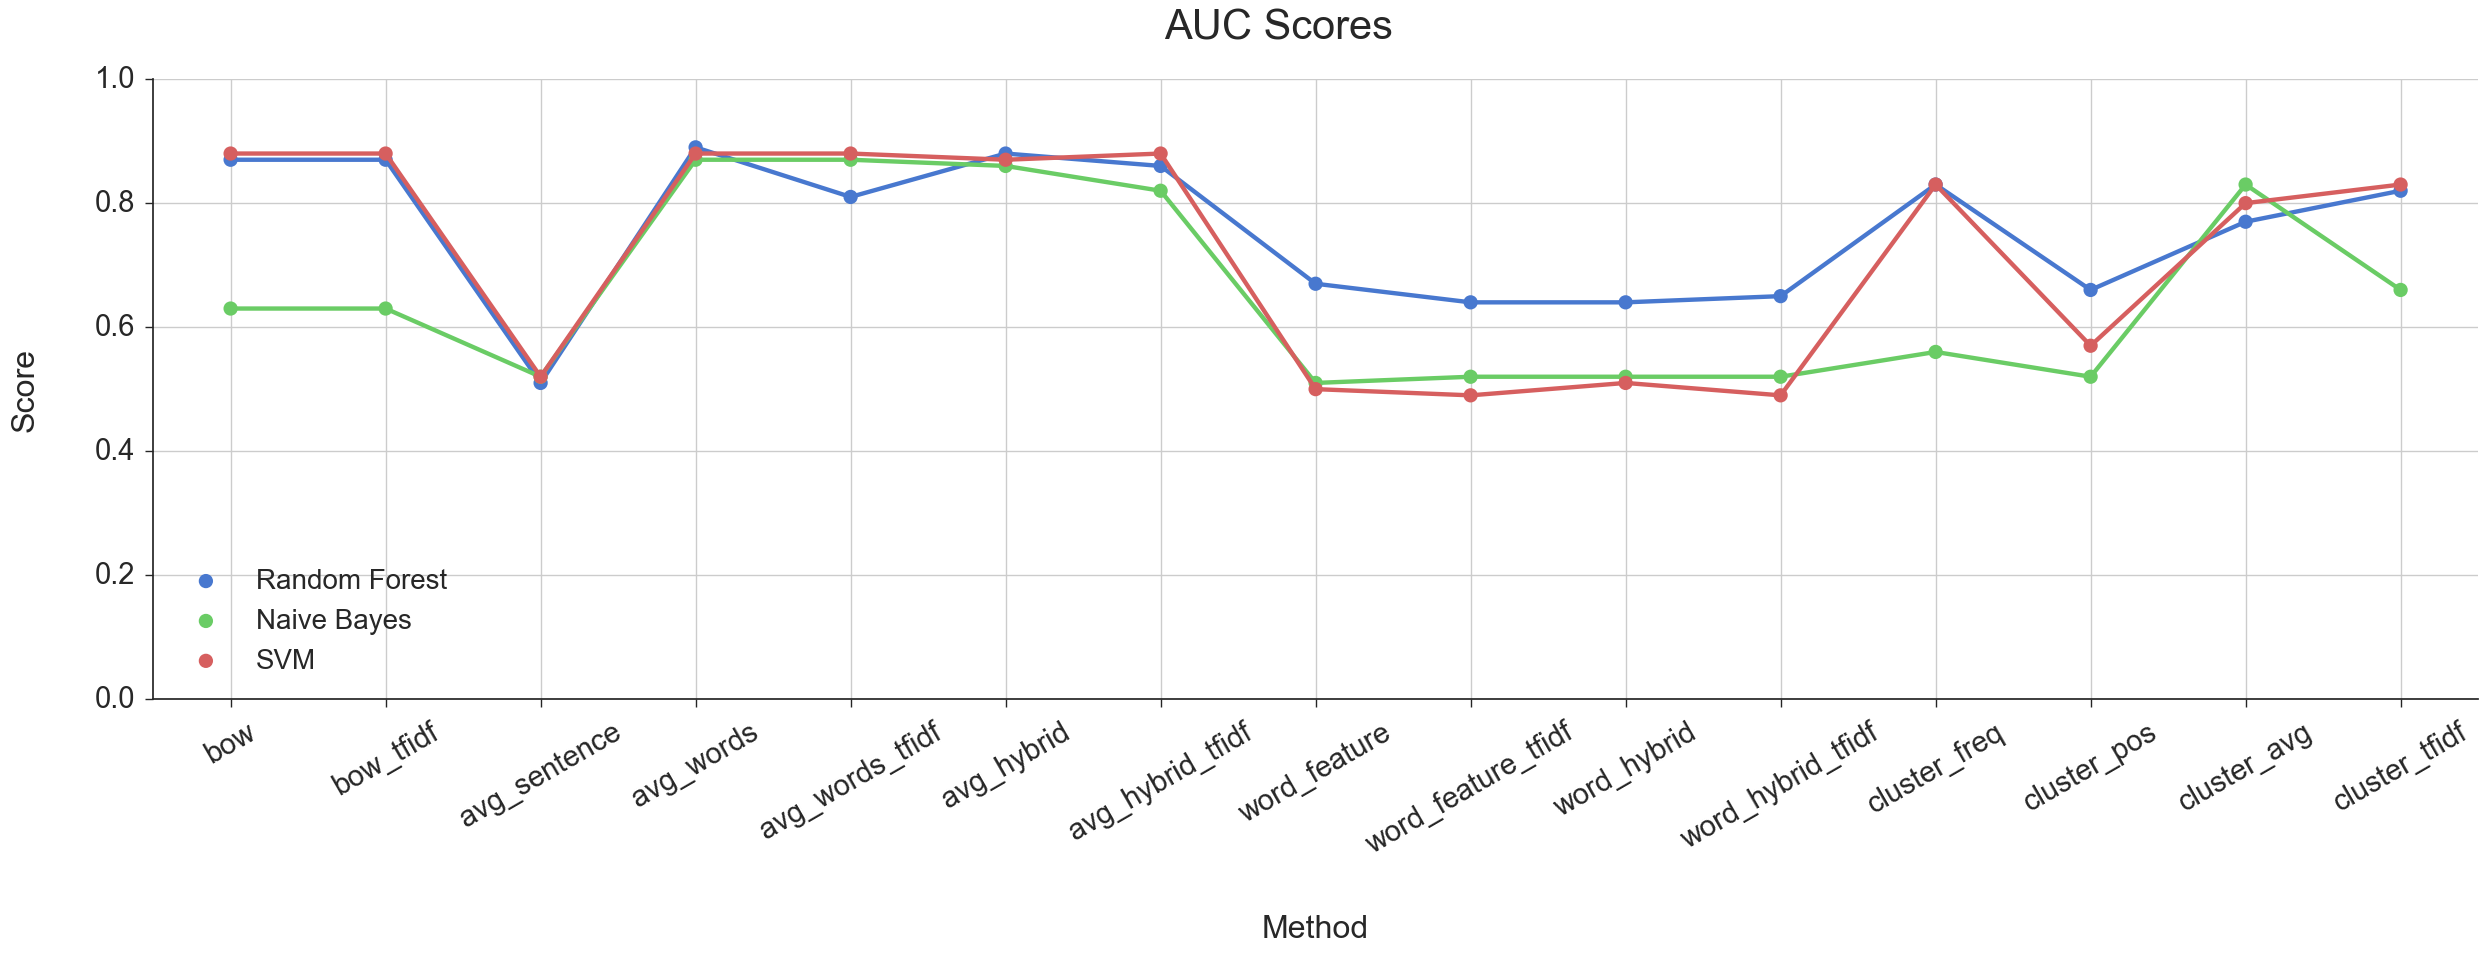

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.88,0.01,0.63,0.02,0.87,0.02
1,bow_tfidf,0.88,0.01,0.63,0.02,0.87,0.02
2,avg_sentence,0.52,0.04,0.52,0.03,0.51,0.03
3,avg_words,0.88,0.01,0.87,0.02,0.89,0.01
4,avg_words_tfidf,0.88,0.01,0.87,0.02,0.81,0.03
5,avg_hybrid,0.87,0.02,0.86,0.01,0.88,0.02
6,avg_hybrid_tfidf,0.88,0.01,0.82,0.02,0.86,0.02
7,word_feature,0.50,0.02,0.51,0.01,0.67,0.03
8,word_feature_tfidf,0.49,0.03,0.52,0.01,0.64,0.02
9,word_hybrid,0.51,0.03,0.52,0.01,0.64,0.03


In [35]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('AUC'))
normal_df = xls.parse('AUC')

# Create the point plot
createPointPlot(transformed_df, 'AUC', 'lower left')

# Show the plot and the results in table
plt.show()
normal_df

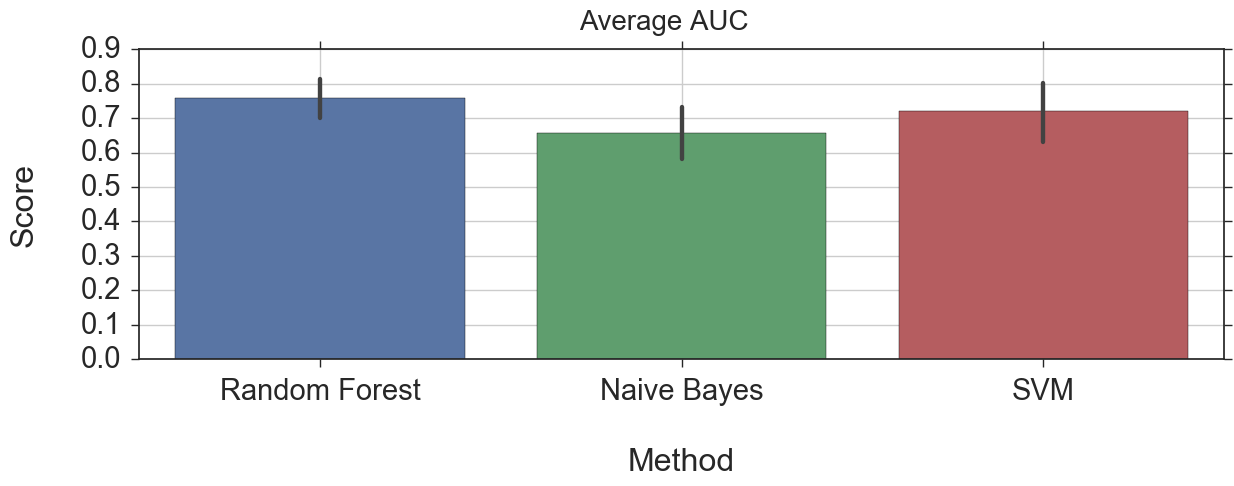

In [20]:
plotBarChart(transformed_df, 'AUC')

# Log Loss

Logarithmic Loss, or simply Log Loss, is a classification loss function. Log Loss quantifies the accuracy of a classifier by penalising false classifications. Minimising the Log Loss is basically equivalent to maximising the accuracy of the classifier.

Log Loss heavily penalises classifiers that are confident about an incorrect classification. For example, if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large indeed. Naturally this is going to have a significant impact on the overall Log Loss for the classifier.

(Source: https://www.r-bloggers.com/making-sense-of-logarithmic-loss/)

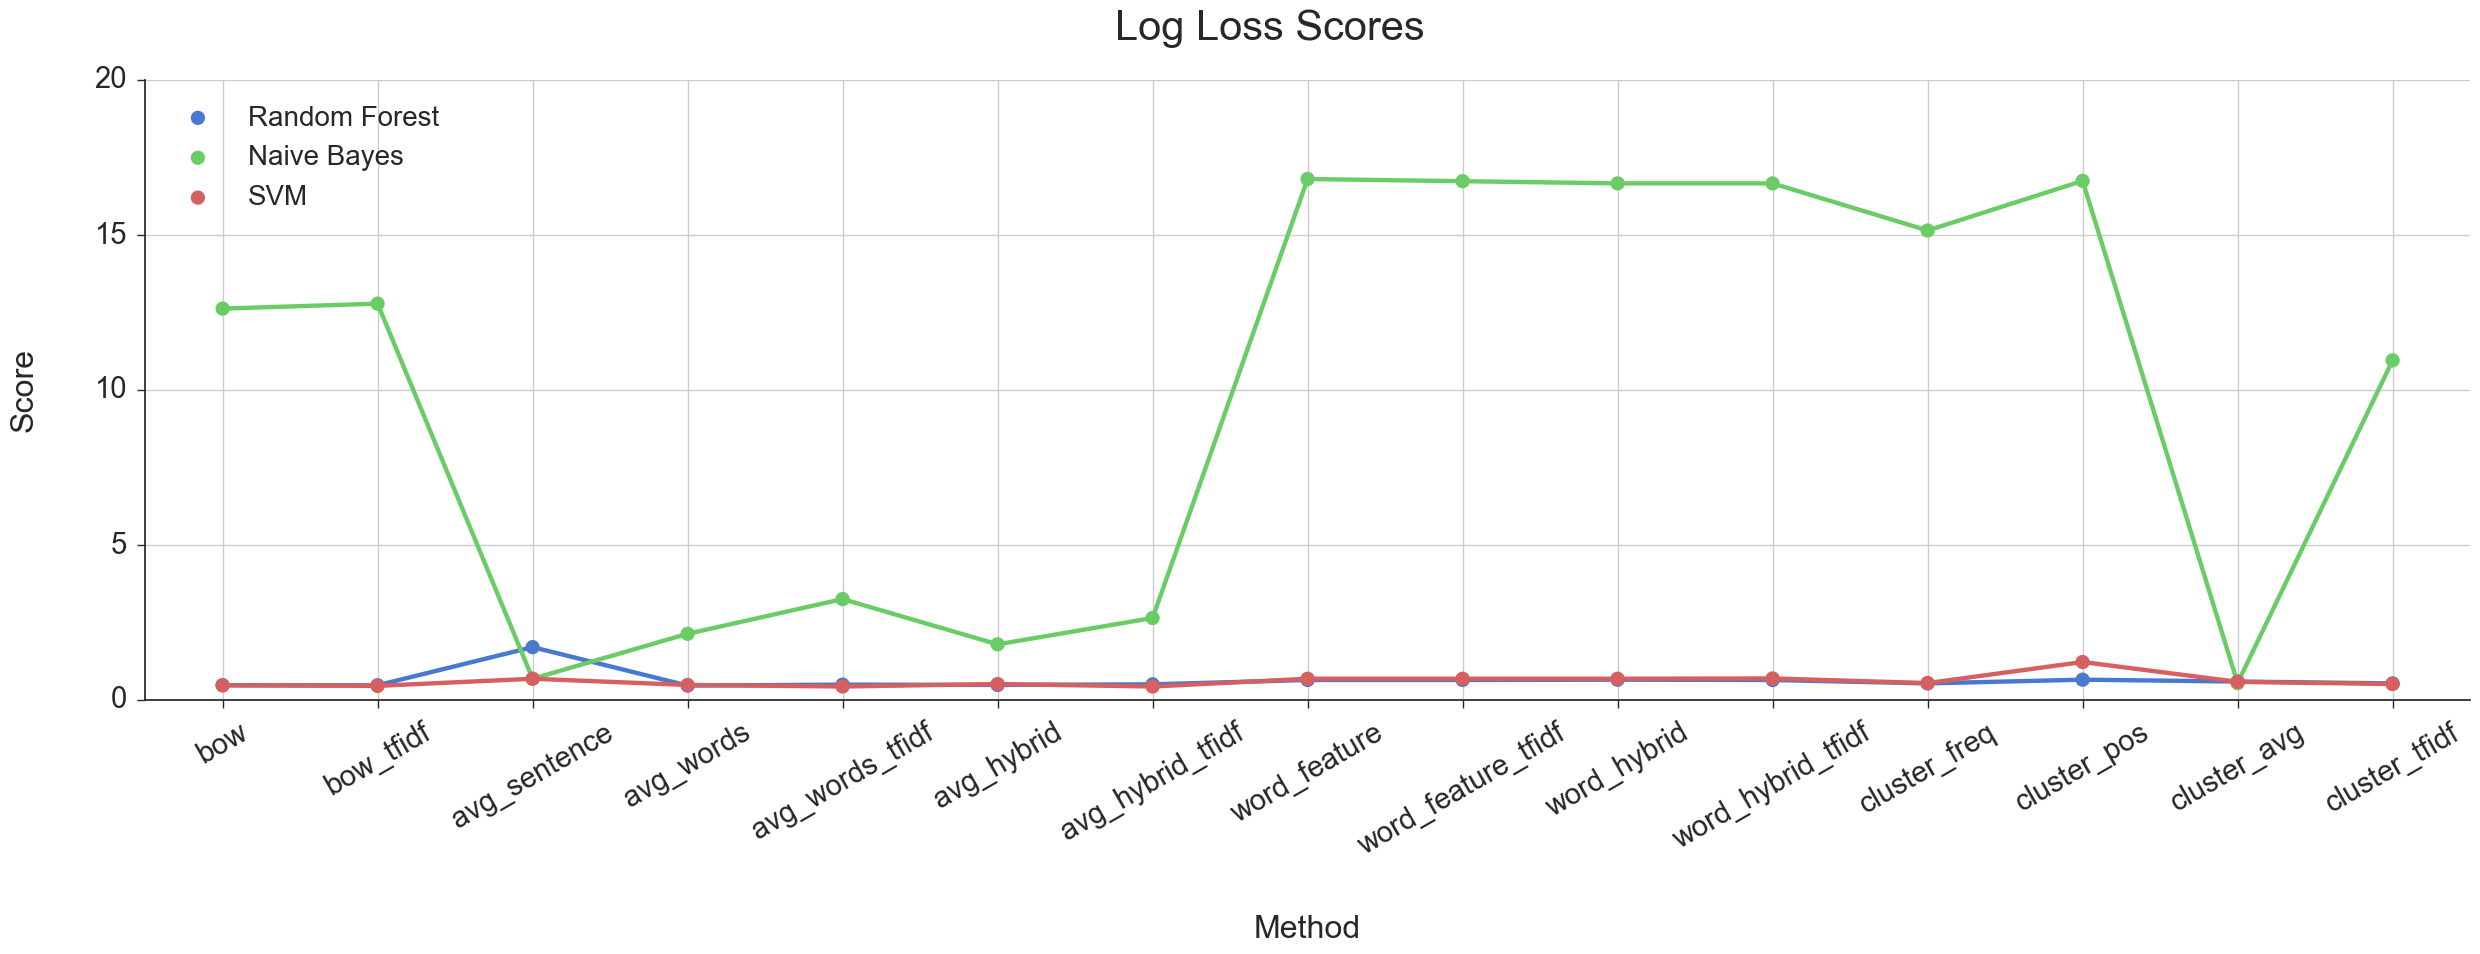

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.48,0.04,12.63,0.62,0.48,0.02
1,bow_tfidf,0.46,0.02,12.79,0.63,0.48,0.02
2,avg_sentence,0.69,0.00,0.69,0.01,1.71,0.21
3,avg_words,0.49,0.01,2.14,0.25,0.47,0.01
4,avg_words_tfidf,0.44,0.03,3.26,0.77,0.50,0.02
5,avg_hybrid,0.52,0.01,1.80,0.18,0.49,0.02
6,avg_hybrid_tfidf,0.44,0.02,2.65,0.40,0.51,0.01
7,word_feature,0.69,0.01,16.81,0.41,0.65,0.02
8,word_feature_tfidf,0.69,0.00,16.74,0.33,0.65,0.01
9,word_hybrid,0.69,0.00,16.67,0.42,0.66,0.01


In [37]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Log Loss'))
normal_df = xls.parse('Log Loss')

# Create the point plot
createPointPlot(transformed_df, 'Log Loss', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

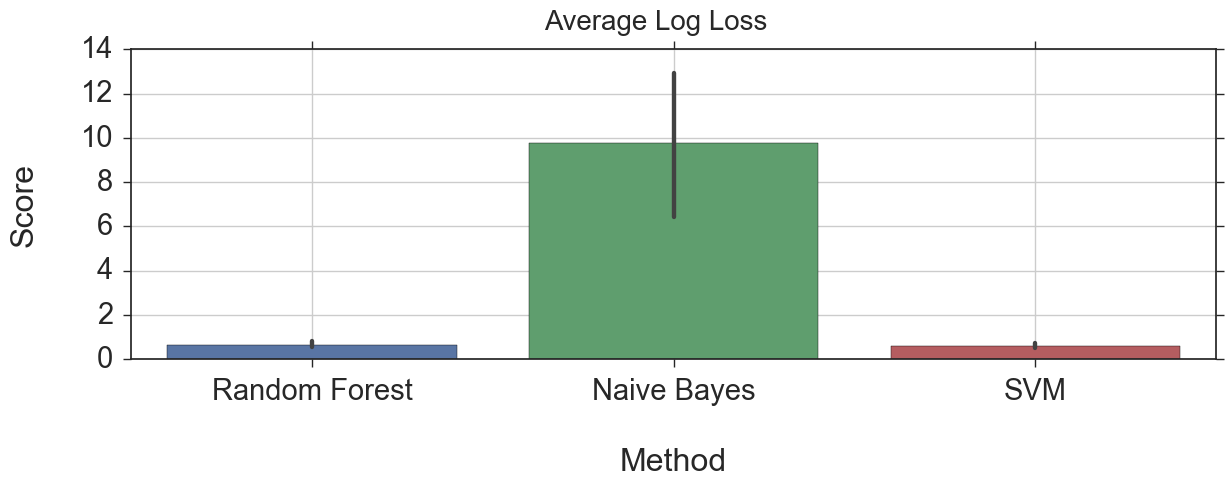

In [22]:
plotBarChart(transformed_df, 'Log Loss')

# Brier Loss Score

The Brier score is a proper score function that measures the accuracy of probabilistic predictions. It is applicable to tasks in which predictions must assign probabilities to a set of mutually exclusive discrete outcomes. The score is the mean squared error of the probability forecasts over the verification sample

Therefore, the lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability.

(Source: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html)

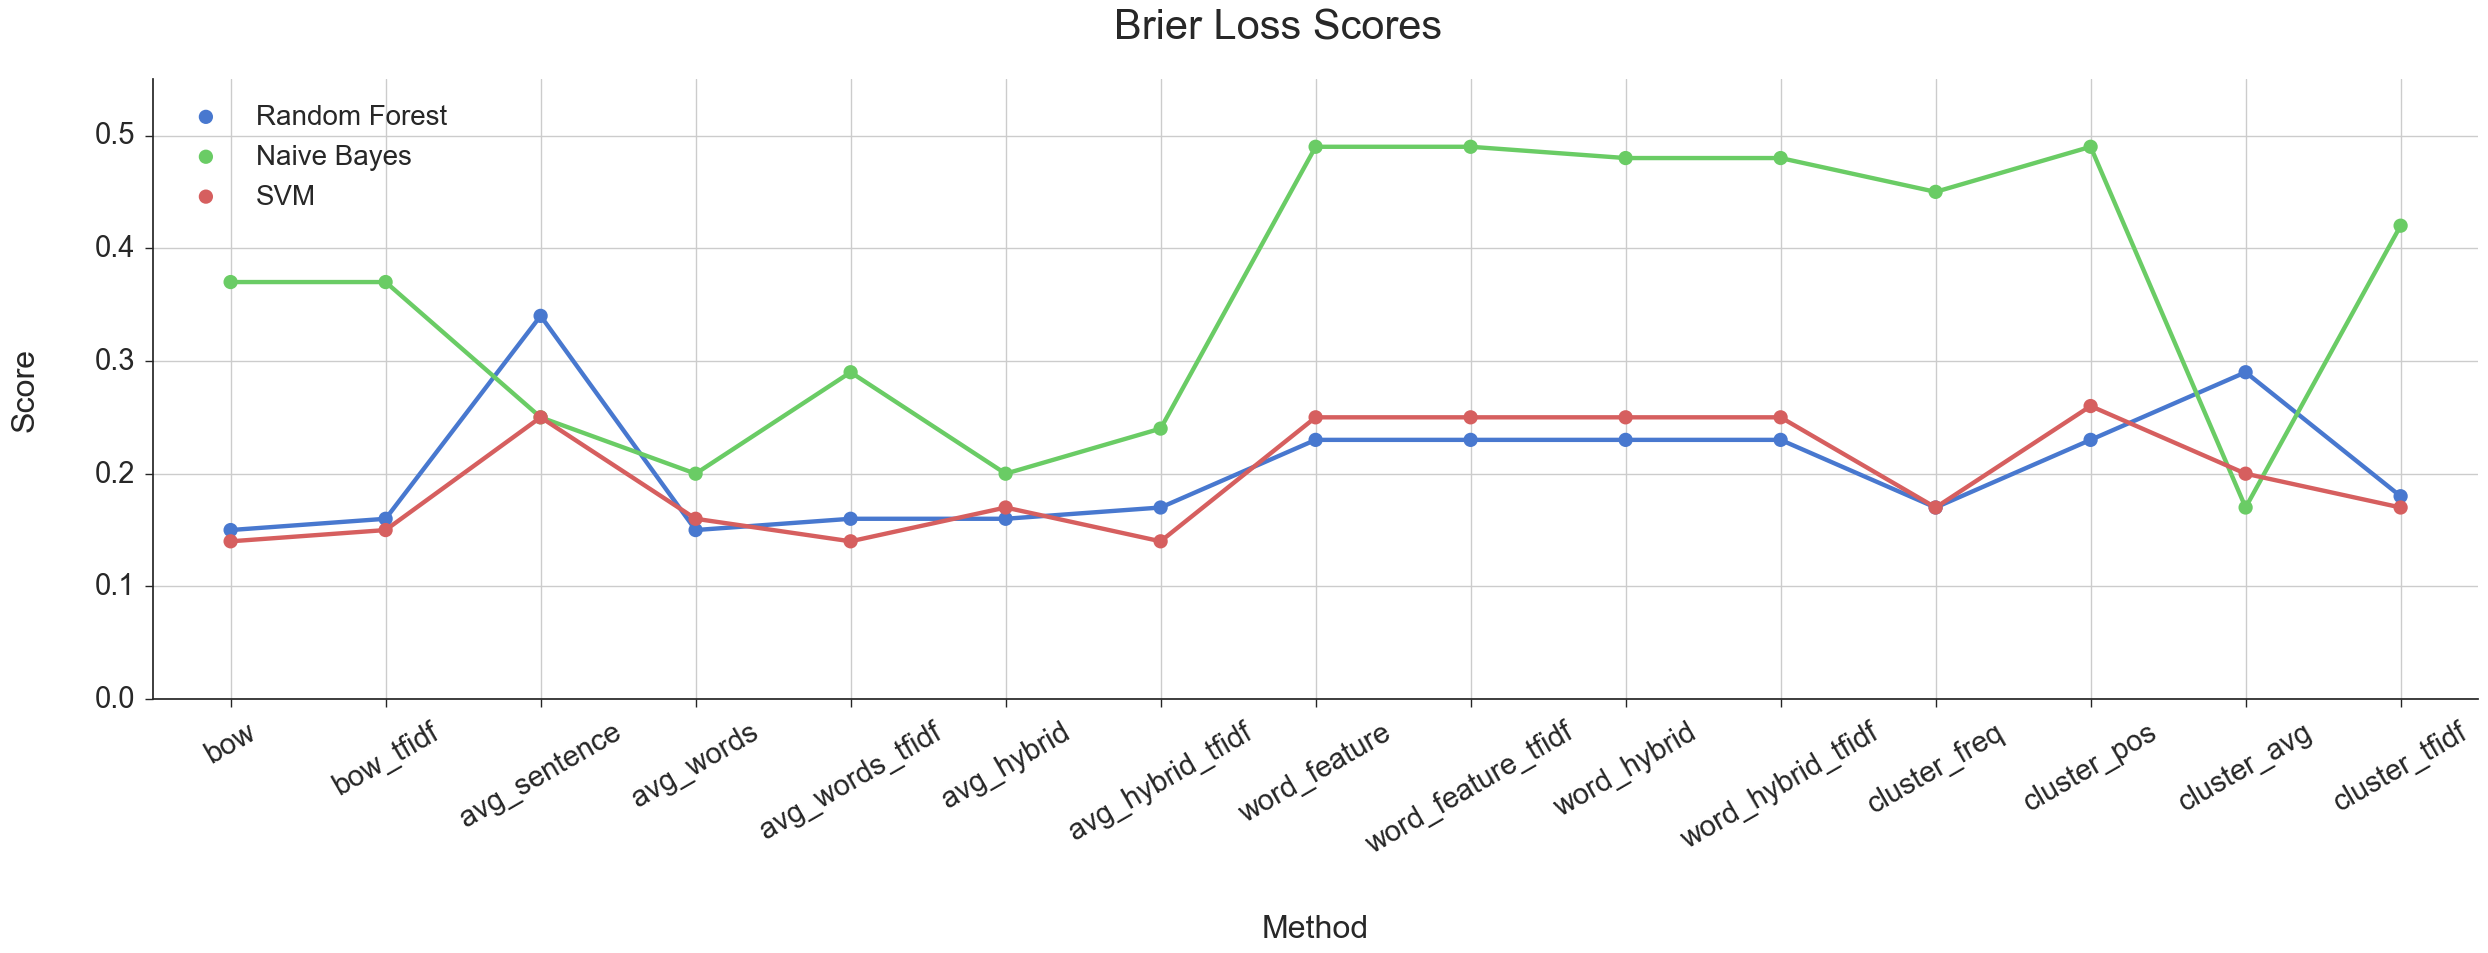

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.14,0.01,0.37,0.02,0.15,0.01
1,bow_tfidf,0.15,0.01,0.37,0.02,0.16,0.01
2,avg_sentence,0.25,0.00,0.25,0.00,0.34,0.02
3,avg_words,0.16,0.00,0.20,0.02,0.15,0.01
4,avg_words_tfidf,0.14,0.01,0.29,0.03,0.16,0.01
5,avg_hybrid,0.17,0.00,0.20,0.02,0.16,0.01
6,avg_hybrid_tfidf,0.14,0.01,0.24,0.03,0.17,0.00
7,word_feature,0.25,0.00,0.49,0.01,0.23,0.01
8,word_feature_tfidf,0.25,0.00,0.49,0.01,0.23,0.00
9,word_hybrid,0.25,0.00,0.48,0.01,0.23,0.01


In [39]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Brier Score'))
normal_df = xls.parse('Brier Score')

# Create the point plot
createPointPlot(transformed_df, 'Brier Loss', 'upper left')

# Show the plot and the results in table
plt.show()
normal_df

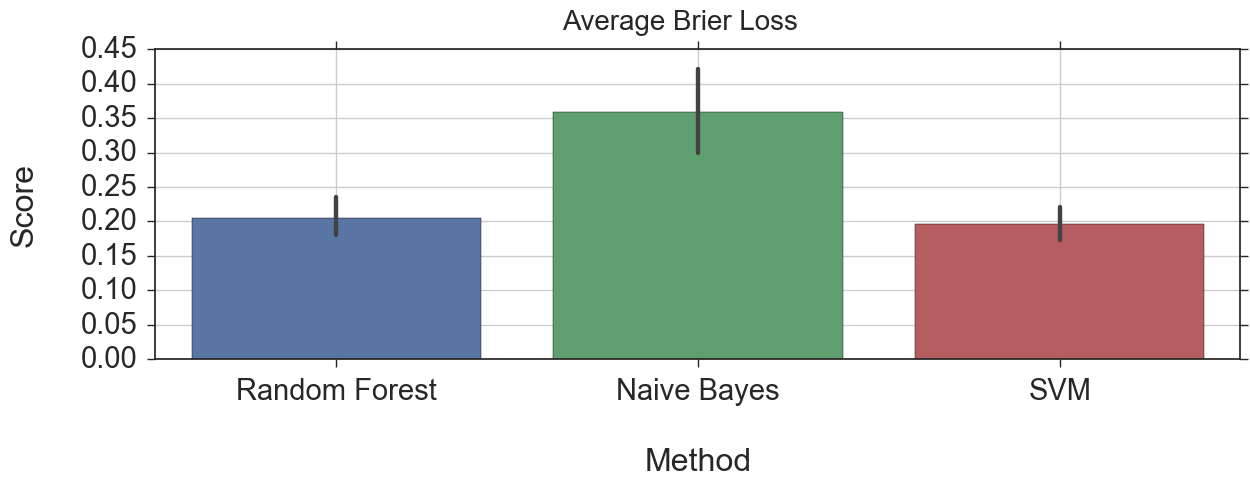

In [24]:
plotBarChart(transformed_df, 'Brier Loss')

# Run Time

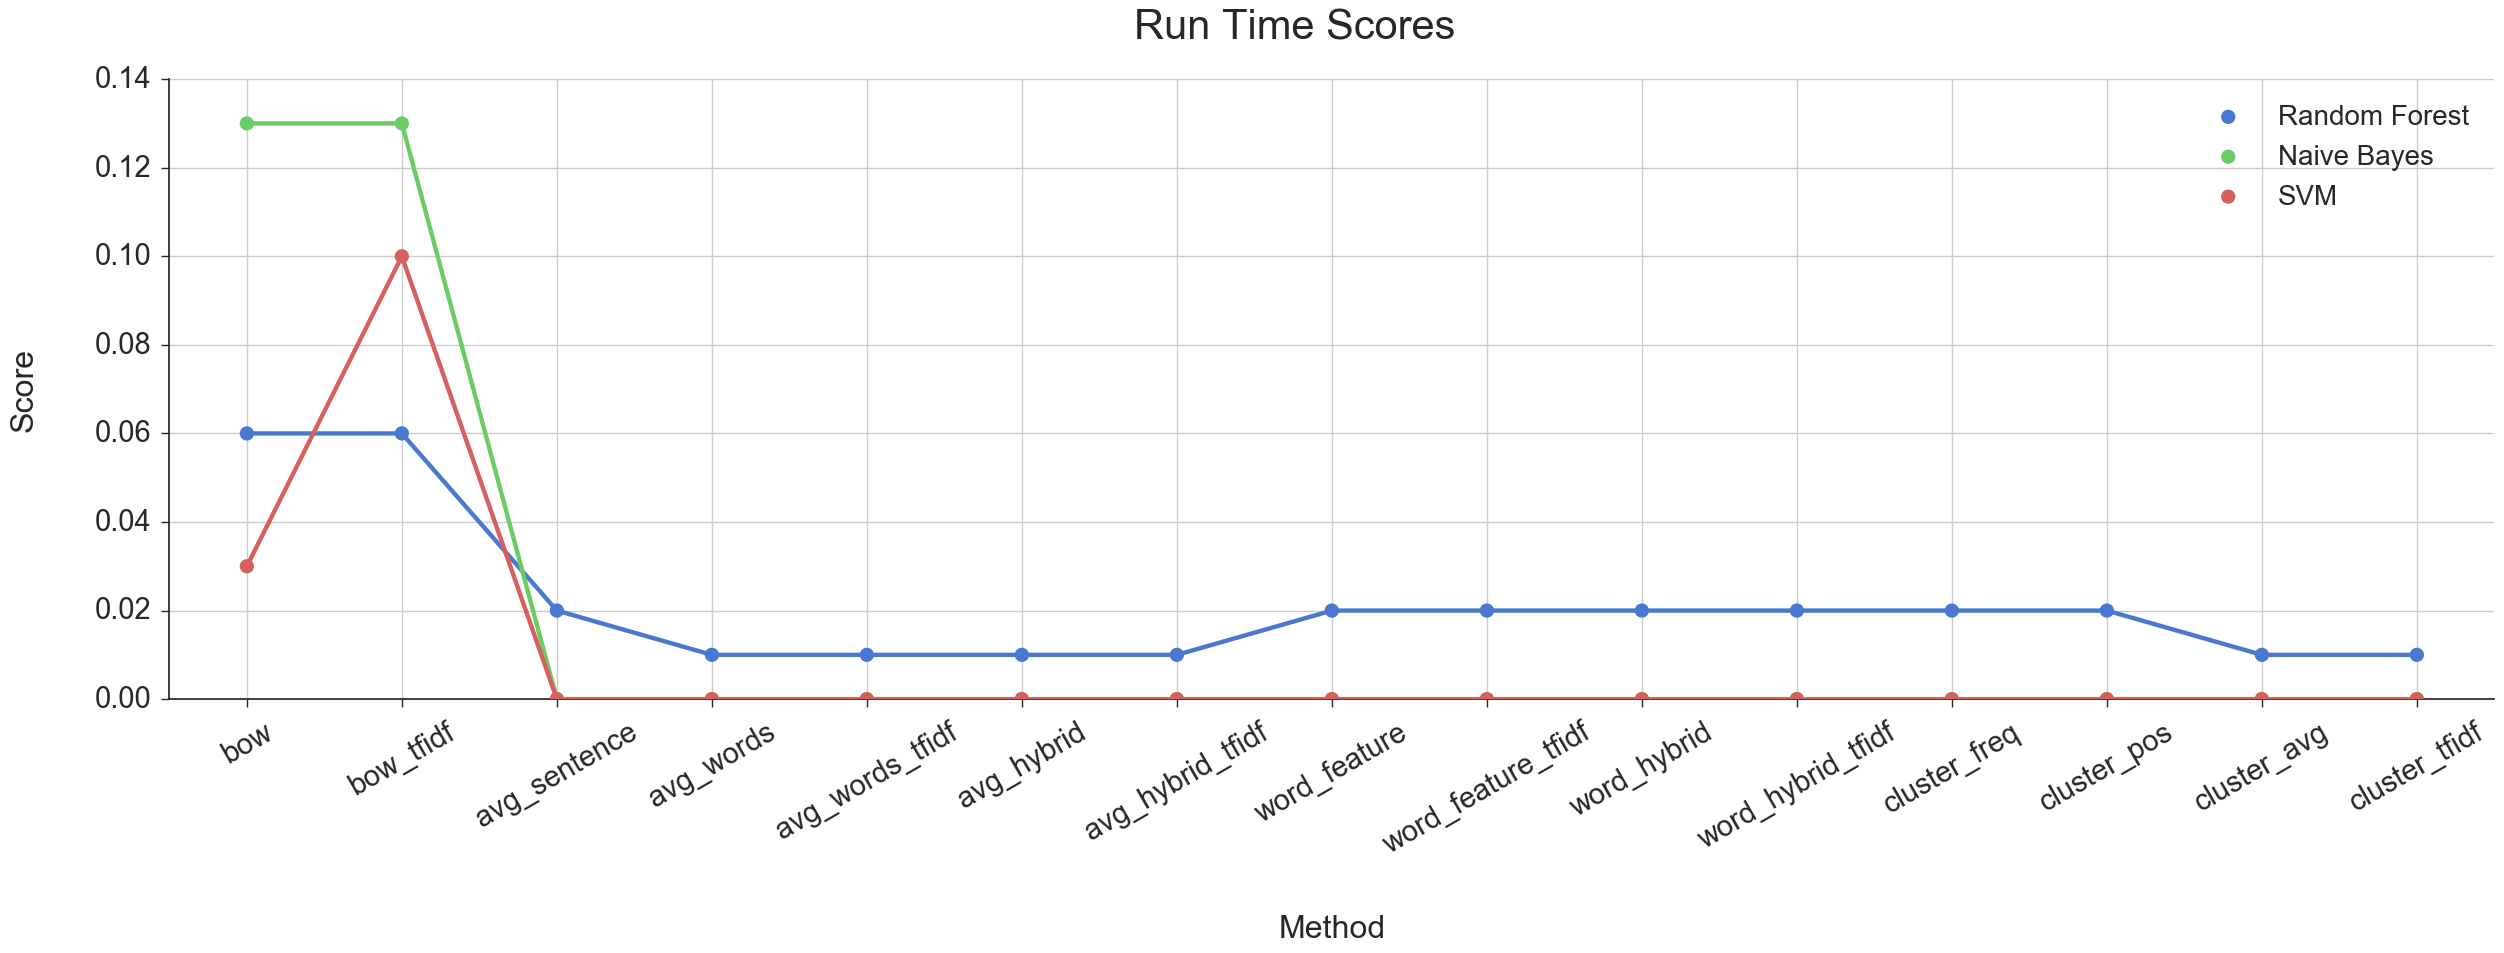

,Method,SVM,SVM (STD),NB,NB (STD),RF,RF (STD)
0,bow,0.03,0,0.13,0,0.06,0
1,bow_tfidf,0.10,0,0.13,0,0.06,0
2,avg_sentence,0.00,0,0.00,0,0.02,0
3,avg_words,0.00,0,0.00,0,0.01,0
4,avg_words_tfidf,0.00,0,0.00,0,0.01,0
5,avg_hybrid,0.00,0,0.00,0,0.01,0
6,avg_hybrid_tfidf,0.00,0,0.00,0,0.01,0
7,word_feature,0.00,0,0.00,0,0.02,0
8,word_feature_tfidf,0.00,0,0.00,0,0.02,0
9,word_hybrid,0.00,0,0.00,0,0.02,0


In [41]:
# Parse the accuracy sheet
# Transform the sheet into a standard dataframe
# Then, create the plot and display the results

transformed_df = standardizeDataFrame(xls.parse('Run Time'))
normal_df = xls.parse('Run Time')

# Create the point plot
createPointPlot(transformed_df, 'Run Time', 'upper right')

# Show the plot and the results in table
plt.show()
normal_df

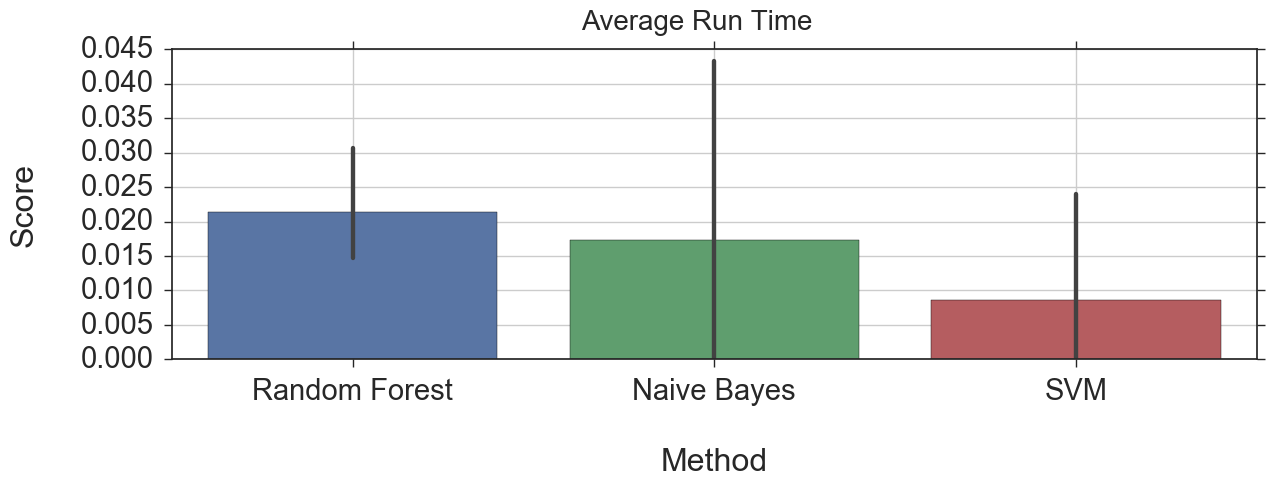

In [26]:
plotBarChart(transformed_df, 'Run Time')